In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#read csvs into dfs, get some basic info out of all of this
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')

print(observations.columns)
print(species_info.columns)

print(observations.head())
print(species_info.head())

print(observations.info())
print(species_info.info())

Index(['scientific_name', 'park_name', 'observations'], dtype='object')
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0             

In [2]:
#combine dfs into one, fill NaN with string value
s_o = observations.merge(species_info, left_on='scientific_name', right_on='scientific_name')
print(s_o.head())
s_o['conservation_status'] = s_o['conservation_status'].fillna('None')
print(s_o.conservation_status.unique())
s_o.info()


#remove duplicates
print(s_o.duplicated().sum())
s_o = s_o.drop_duplicates()
print("Unique scientific names: " + str(s_o.scientific_name.nunique()))
print("Unique common names: " + str(s_o.common_names.nunique()))



      scientific_name                            park_name  observations  \
0  Vicia benghalensis  Great Smoky Mountains National Park            68   
1  Vicia benghalensis               Yosemite National Park           148   
2  Vicia benghalensis            Yellowstone National Park           247   
3  Vicia benghalensis                  Bryce National Park           104   
4      Neovison vison  Great Smoky Mountains National Park            77   

         category                        common_names conservation_status  
0  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
1  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
2  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
3  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
4          Mammal                       American Mink                 NaN  
['None' 'Species of Concern' 'Threatened' 'Endangered' 'In Recovery']
<class 'pandas.co

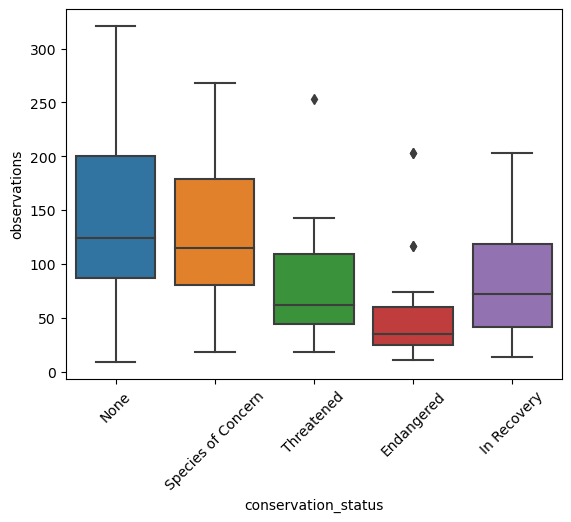

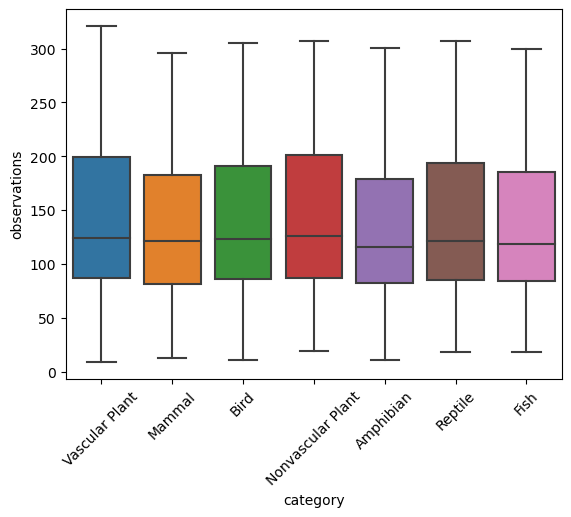

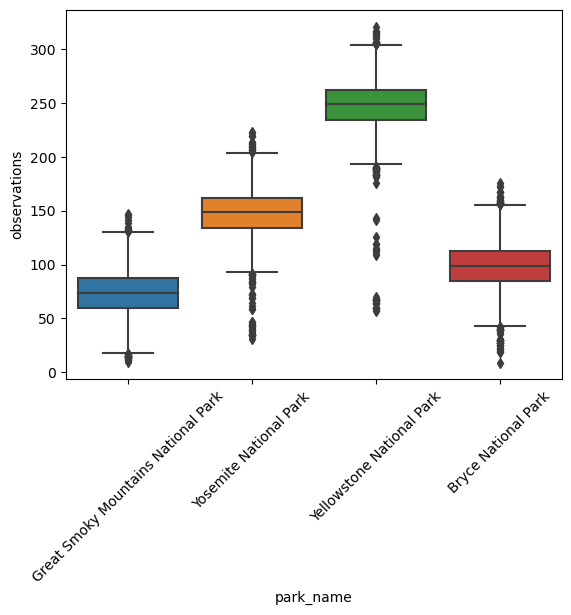

<Figure size 640x480 with 0 Axes>

In [3]:
#boxplot observations vs. conservation status to determine correlation

sns.boxplot(data=s_o, x='conservation_status', y='observations')
plt.xticks(rotation=45)
plt.show()
plt.clf()

sns.boxplot(data=s_o, x='category', y='observations')
plt.xticks(rotation=45)
plt.show()
plt.clf()

sns.boxplot(data=s_o, x='park_name', y='observations')
plt.xticks(rotation=45)
plt.show()
plt.clf()

In [4]:
drop_none = observations.merge(species_info, left_on='scientific_name', right_on='scientific_name')
drop_none = drop_none.dropna()
print(drop_none.head())

                      scientific_name                            park_name  \
120                  Zizia trifoliata               Yosemite National Park   
121                  Zizia trifoliata            Yellowstone National Park   
122                  Zizia trifoliata                  Bryce National Park   
123                  Zizia trifoliata  Great Smoky Mountains National Park   
204  Camissonia sierrae ssp. alticola                  Bryce National Park   

     observations        category  \
120           135  Vascular Plant   
121           238  Vascular Plant   
122            87  Vascular Plant   
123            80  Vascular Plant   
204            84  Vascular Plant   

                                          common_names conservation_status  
120  Meadow Alexanders, Three-Leaved Golden Alexanders  Species of Concern  
121  Meadow Alexanders, Three-Leaved Golden Alexanders  Species of Concern  
122  Meadow Alexanders, Three-Leaved Golden Alexanders  Species of Concern  


In [5]:
#creating separate df with only relevant data, removing animals with no conservation status
drop_none.describe(include='all')
special = drop_none[['scientific_name', 'category', 'conservation_status']]
special = special.drop_duplicates()
print(special.head())
print(special.conservation_status.value_counts())

                              scientific_name        category  \
120                          Zizia trifoliata  Vascular Plant   
204          Camissonia sierrae ssp. alticola  Vascular Plant   
376                          Tofieldia glabra  Vascular Plant   
512                        Accipiter cooperii            Bird   
620  Dichanthelium acuminatum var. acuminatum  Vascular Plant   

    conservation_status  
120  Species of Concern  
204  Species of Concern  
376  Species of Concern  
512  Species of Concern  
620  Species of Concern  
Species of Concern    151
Endangered             15
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64


Species of Concern    151
Endangered             15
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64
Bird                 75
Vascular Plant       46
Mammal               31
Fish                 11
Amphibian             7
Reptile               5
Nonvascular Plant     5
Name: category, dtype: int64
range(0, 180)
category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                   1     4     3       6                  0   
In Recovery                  0     3     0       1                  0   
Species of Concern           4    68     4      22                  5   
Threatened                   2     0     4       2                  0   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered                 0               1  
In Recovery                0               0  
Species of Concern

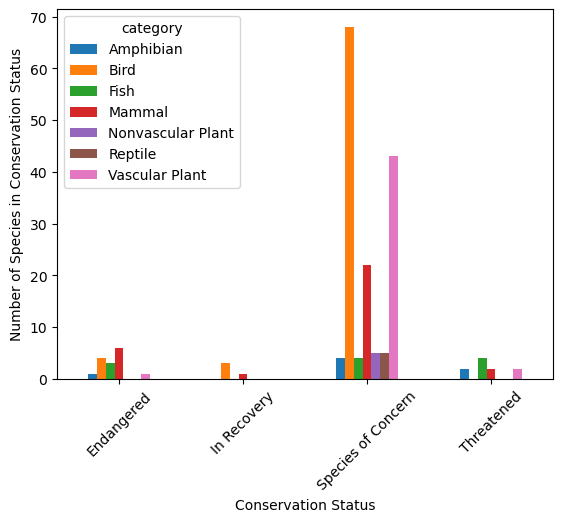

<Figure size 640x480 with 0 Axes>

In [65]:
#calculating initial data/stats
con_stats = special.conservation_status.value_counts()
cat = special.category.value_counts()
print(con_stats)
print(cat)
print(range(len(special)))


cat_stats = pd.crosstab(special.conservation_status, special.category).sort_index(axis=1, ascending=True)
print(cat_stats)
cat_stats_prop = cat_stats/len(special)
print(cat_stats_prop)
#from this, it looks like birds, followed by mammals/vascular plants have the most species in conservation status
cat_stats_cat = cat_stats_prop.sum(axis=0)
cat_stats_con = cat_stats_prop.sum(axis=1)

#further calculations, order is: birds, malls, vascular plants with mostly species of concern
print(cat_stats_cat)
print(cat_stats_con)

cat_stats.plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species in Conservation Status')
plt.show()
plt.savefig('cat_stats.png')
plt.clf()